<h1><center>Scrapping Coronavirus</center></h1>

In [1]:
#import important libraries for our work
import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import pandas as pd
import datetime

In [2]:
today=datetime.date.today().strftime("%m-%d-%Y")
data_date=datetime.date.today()-datetime.timedelta(days=1)
print("Today is {}".format(today))
data_date=data_date.strftime("%m-%d-%Y")

Today is 11-06-2020


In [3]:
url= 'https://www.worldometers.info/coronavirus/'

url= 'https://coronavirus.1point3acres.com/'


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 49,250,668 Cases and 1,242,709 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/fav
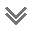

In [4]:
# get web data
req = requests.get(url)
response = req.content
# parse web data
soup = BeautifulSoup(response, "html.parser")
soup

In [5]:
# find the table
#table is in the last of the page

thead= soup.find_all('thead')[-1]
print(thead)

<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>


In [6]:
# get all rows in thead
head = thead.find_all('tr')
head

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 </tr>]

In [7]:
# get the table data content
tbody = soup.find_all('tbody')[0]
tbody

<tbody>
<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>11,830,538</td>
<td>+23,233</td>
<td>360,566</td>
<td>+716</td>
<td>7,763,454</td>
<td>+7,341</td>
<td>3,706,518</td>
<td>21,833</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<td>
</td>
<td></td>
<td></td>
</tr>
<tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Asia</nobr>
</td>
<td>14,202,133</td>
<td>+66,756</td>
<td>251,839</td>
<td>+1,065</td>
<td>12,670,795</td>
<td>+51,891</td>
<td>1,279,499</td>
<td>22,702</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Asia" style="display:none;">Asia</td>
<td>
</td>
<td></td>
<td></td>
</tr>
<tr class="total_row_world row_continent" data-continent="South America" style="disp

In [8]:
body = tbody.find_all('tr')
body

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>11,830,538</td>
 <td>+23,233</td>
 <td>360,566</td>
 <td>+716</td>
 <td>7,763,454</td>
 <td>+7,341</td>
 <td>3,706,518</td>
 <td>21,833</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <td>
 </td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>14,202,133</td>
 <td>+66,756</td>
 <td>251,839</td>
 <td>+1,065</td>
 <td>12,670,795</td>
 <td>+51,891</td>
 <td>1,279,499</td>
 <td>22,702</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="display:none;">Asia</td>
 <td>
 </td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent"

In [9]:
# get the table contents

# container for  column title
head_rows = []


# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
print(head_rows[0])

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl']


In [10]:
# container for contents
body_rows = []

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
print(body_rows)

[['', '\nNorth America\n', '11,830,538', '+23,233', '360,566', '+716', '7,763,454', '+7,341', '3,706,518', '21,833', '', '', '', '', '', 'North America', '\n', '', ''], ['', '\nAsia\n', '14,202,133', '+66,756', '251,839', '+1,065', '12,670,795', '+51,891', '1,279,499', '22,702', '', '', '', '', '', 'Asia', '\n', '', ''], ['', '\nSouth America\n', '9,879,618', '+1,947', '300,086', '+56', '8,856,472', '+1,597', '723,060', '17,853', '', '', '', '', '', 'South America', '\n', '', ''], ['', '\nEurope\n', '11,442,323', '+138,020', '284,899', '+1,972', '4,232,104', '+68,230', '6,925,320', '25,449', '', '', '', '', '', 'Europe', '\n', '', ''], ['', '\nAfrica\n', '1,855,287', '+1,118', '44,324', '+8', '1,549,396', '+746', '261,567', '2,424', '', '', '', '', '', 'Africa', '\n', '', ''], ['', '\nOceania\n', '40,048', '+12', '980', '', '32,819', '+32', '6,249', '24', '', '', '', '', '', 'Australia/Oceania', '\n', '', ''], ['', '\n\n', '721', '', '15', '', '659', '', '47', '4', '', '', '', '', '', 

In [11]:
df_bs = pd.DataFrame(body_rows[:len(body_rows)],columns=head_rows[0]) 
df_bs

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,,\nNorth America\n,"11,830,538","+23,233","360,566",+716,"7,763,454","+7,341","3,706,518","21,833",,,,,,North America,\n,,
1,,\nAsia\n,"14,202,133","+66,756","251,839","+1,065","12,670,795","+51,891","1,279,499","22,702",,,,,,Asia,\n,,
2,,\nSouth America\n,"9,879,618","+1,947","300,086",+56,"8,856,472","+1,597","723,060","17,853",,,,,,South America,\n,,
3,,\nEurope\n,"11,442,323","+138,020","284,899","+1,972","4,232,104","+68,230","6,925,320","25,449",,,,,,Europe,\n,,
4,,\nAfrica\n,"1,855,287","+1,118","44,324",+8,"1,549,396",+746,"261,567","2,424",,,,,,Africa,\n,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,214,MS Zaandam,9,,2,,,,7,,,,,,,,,,
222,215,Anguilla,3,,,,3,,0,,199,,"1,820","120,930","15,050",North America,"5,017",,8
223,216,Marshall Islands,1,,,,,,1,,17,,,,"59,329",Australia/Oceania,"59,329",,
224,217,Wallis and Futuna,1,,,,1,,0,,90,,"1,046","93,652","11,169",Australia/Oceania,"11,169",,11


In [12]:
# continentdata
cols=['Continent','TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', ]

continent_data = df_bs.iloc[:8, :-3].reset_index(drop=True)


# drop unwanted columns
continent_data = continent_data.drop('#', axis=1)
#rearrange Columns Sequence
continent_data = continent_data[cols]
continent_data['Continent'].loc[6]="Not Assigned"
continent_data['Continent'].loc[7]="World"


continent_data

,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical"
0,North America,"11,830,538","+23,233","360,566",+716,"7,763,454","+7,341","3,706,518","21,833"
1,Asia,"14,202,133","+66,756","251,839","+1,065","12,670,795","+51,891","1,279,499","22,702"
2,South America,"9,879,618","+1,947","300,086",+56,"8,856,472","+1,597","723,060","17,853"
3,Europe,"11,442,323","+138,020","284,899","+1,972","4,232,104","+68,230","6,925,320","25,449"
4,Africa,"1,855,287","+1,118","44,324",+8,"1,549,396",+746,"261,567","2,424"
5,Australia/Oceania,"40,048",+12,980,,"32,819",+32,"6,249",24
6,Not Assigned,721,,15,,659,,47,4
7,World,"49,250,668","+231,086","1,242,709","+3,817","35,105,699","+129,837","12,902,260","90,289"


In [13]:
from pandas_profiling import ProfileReport
prof = ProfileReport(continent_data)
prof.to_file('output.html')

https://www.kaggle.com/abhinand05/covid-19-digging-a-bit-deeper

<h1><center>Scrapping Noticias</center></h1>

In [14]:
# News Scrapping using BeautifulSoup

from bs4 import BeautifulSoup
import requests
import os


def mainScrapp():
    #url = "https://timesofindia.indiatimes.com/india"
    #url_google_news = "https://news.google.com/news/headlines?hl=en-IN&gl=IN&ned=in"
    url_google_news = "https://news.google.com/news/headlines?ned=in&hl=en-IN&gl=IN"

    data = requests.get(url_google_news)
    soup = BeautifulSoup(data.content, "lxml")
    # instead of html_parser, lxml can also be used

    filename = 'scrapped_headlines.txt'

    links = soup.find_all("a")
    with open(filename, 'w', encoding='utf-8') as f:
        for link in links:
            text = link.text
            headline_length = len(text.split())
            if headline_length > 4:
                f.write(text)
                f.write('\n')
    f.close()


if __name__ == '__main__':
    mainScrapp()

In [15]:
# Cleaning scrapped data to remove punctuation, numbers and make it to lower case
# Write the data to a file to be used further

import re
from string import punctuation
import os


def ppMain():

    f = open('scrapped_headlines.txt', 'rt', encoding='utf-8')
    text_file = f.read().split('\n')

    text_lower = [text.lower() for text in text_file]
    text_letters = [''.join(c for c in s if c not in punctuation) for s in text_lower]

    text_final = [re.sub(r'[^A-Za-z]+', ' ', x) for x in text_letters]

    with open('headlines_cleaned.txt', 'w') as fw:
        for text in text_final:
            fw.write(text)
            fw.write('\n')
    fw.close()


if __name__ == '__main__':
    ppMain()

C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


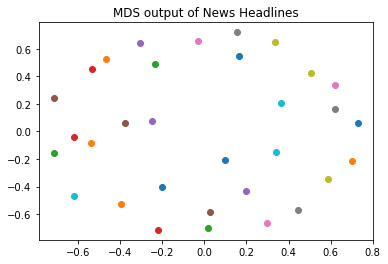

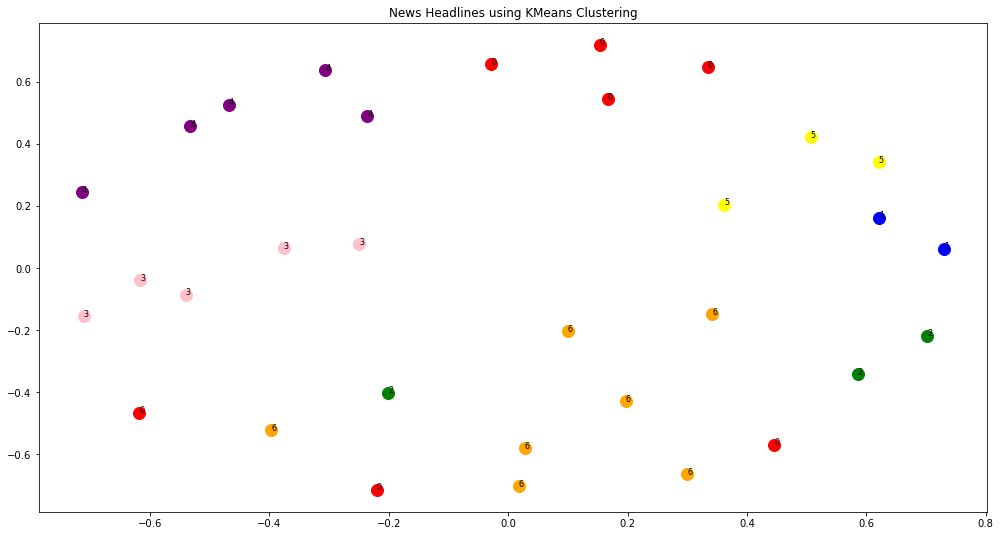

In [16]:
# Tokenize and Stem Data
# Convert words to Vector Space using TFIDF matrix
# Using KMeans clustering to find out clusters
# Calculate Cosine Similarity and generate the distance matrix
# Dimensionality reduction using MDS to results the KMeans output

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import os


# Tokenizer to return stemmed words, we use this
def tokenize_and_stem(text_file):
    # declaring stemmer and stopwords language
    stemmer = SnowballStemmer("english")
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text_file)
    filtered = [w for w in words if w not in stop_words]
    stems = [stemmer.stem(t) for t in filtered]
    return stems


def kmeansMain():

    data = pd.read_csv('headlines_cleaned.txt', names=['text'])

    # text data in dataframe and removing stops words
    stop_words = set(stopwords.words('english'))
    data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Using TFIDF vectorizer to convert convert words to Vector Space
    tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                       use_idf=True,
                                       stop_words='english',
                                       tokenizer=tokenize_and_stem)



    # Fit the vectorizer to text data
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])
    terms = tfidf_vectorizer.get_feature_names()
    # print(terms)

    # Kmeans++
    km = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=1, verbose=0, random_state=3425)
    km.fit(tfidf_matrix)
    labels = km.labels_
    clusters = labels.tolist()

    # Calculating the distance measure derived from cosine similarity
    distance = 1 - cosine_similarity(tfidf_matrix)

    # Dimensionality reduction using Multidimensional scaling (MDS)
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    pos = mds.fit_transform(distance)
    xs, ys = pos[:, 0], pos[:, 1]

    # Saving cluster visualization after mutidimensional scaling
    for x, y, in zip(xs, ys):
        plt.scatter(x, y)
    plt.title('MDS output of News Headlines')
    plt.savefig('MDS.png')

    # Creating dataframe containing reduced dimensions, identified labels and text data for plotting KMeans output
    df = pd.DataFrame(dict(label=clusters, data=data['text'], x=xs, y=ys))
    df.to_csv('kmeans_clustered_DF.txt', sep=',')

    label_color_map = {0: 'red',
                       1: 'blue',
                       2: 'green',
                       3: 'pink',
                       4: 'purple',
                       5: 'yellow',
                       6: 'orange',
                       7: 'grey'
                       }

    csv = open('kmeans_clustered_output.txt', 'w')
    csv.write('Cluster     Headline\n')

    fig, ax = plt.subplots(figsize=(17, 9))

    for index, row in df.iterrows():
        cluster = row['label']
        label_color = label_color_map[row['label']]
        label_text = row['data']
        ax.plot(row['x'], row['y'], marker='o', ms=12, c=label_color)
        row = str(cluster) + ',' + label_text + '\n'
        csv.write(row)

    # ax.legend(numpoints=1)
    for i in range(len(df)):
        ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['label'], size=8)

    plt.title('News Headlines using KMeans Clustering')
    plt.savefig('kmeans.png')


if __name__ == '__main__':
    kmeansMain()

C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


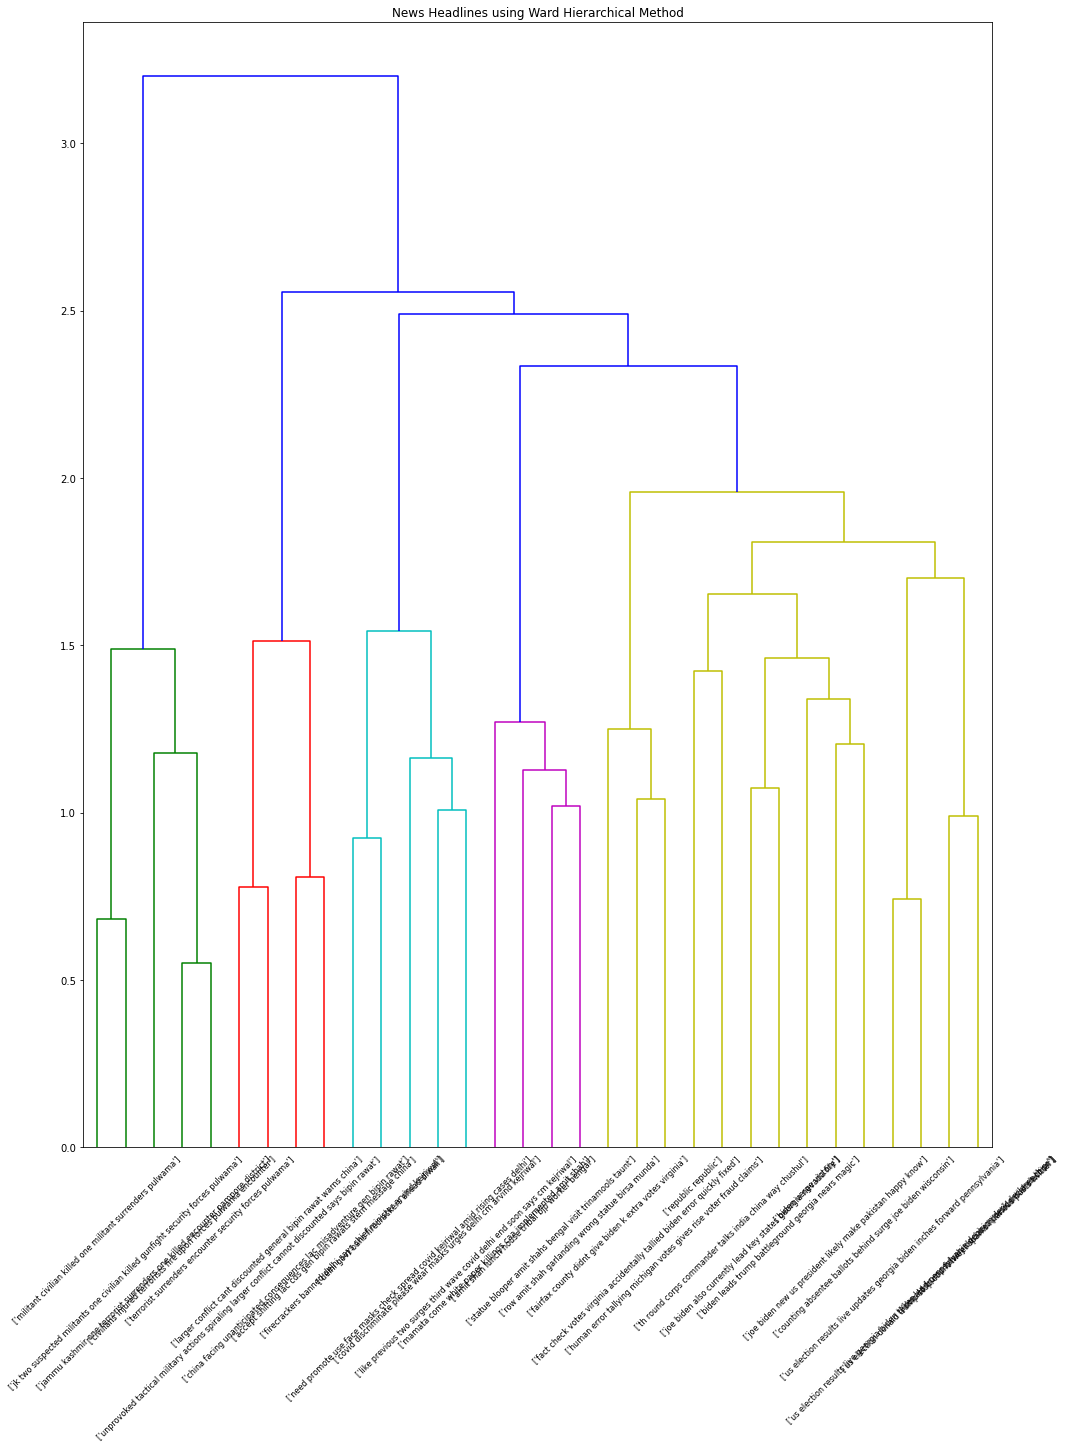

In [17]:
# Tokenize and Stem Data
# Convert words to Vector Space using TFIDF matrix
# Calculate Cosine Similarity and generate the distance matrix
# Uses Ward method to generate an hierarchy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import ward, dendrogram
import os


# Function to return a list of stemmed words
def tokenize_and_stem(text_file):
    # declaring stemmer and stopwords language
    stemmer = SnowballStemmer("english")
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text_file)
    filtered = [w for w in words if w not in stop_words]
    stems = [stemmer.stem(t) for t in filtered]
    return stems


def hierarchicalMain():

    data = pd.read_csv('headlines_cleaned.txt', names=['text'])

    # text data in dataframe and removing stops words
    stop_words = set(stopwords.words('english'))
    data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Using TFIDF vectorizer to convert convert words to Vector Space
    tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                       use_idf=True,
                                       stop_words='english',
                                       tokenizer=tokenize_and_stem)
    #                                   ngram_range=(1, 3))

    # Fit the vectorizer to text data
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

    # Calculating the distance measure derived from cosine similarity
    distance = 1 - cosine_similarity(tfidf_matrix)

    # Ward’s method produces a hierarchy of clusterings
    linkage_matrix = ward(distance)
    fig, ax = plt.subplots(figsize=(15, 20)) # set size
    ax = dendrogram(linkage_matrix, orientation="top", labels=data.values)
    plt.tight_layout()
    plt.title('News Headlines using Ward Hierarchical Method')
    plt.savefig('hierarchical.png')


if __name__ == '__main__':
    hierarchicalMain()

Starting run


C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the st

Run complete


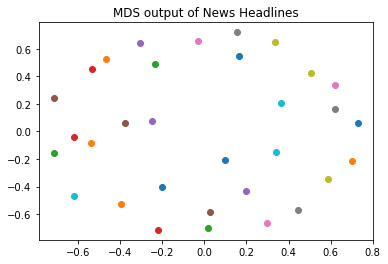

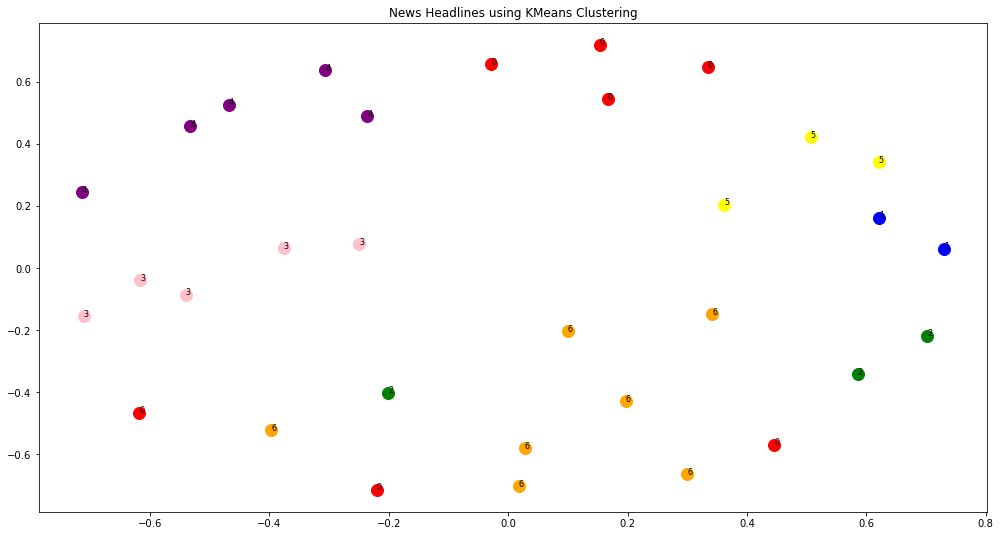

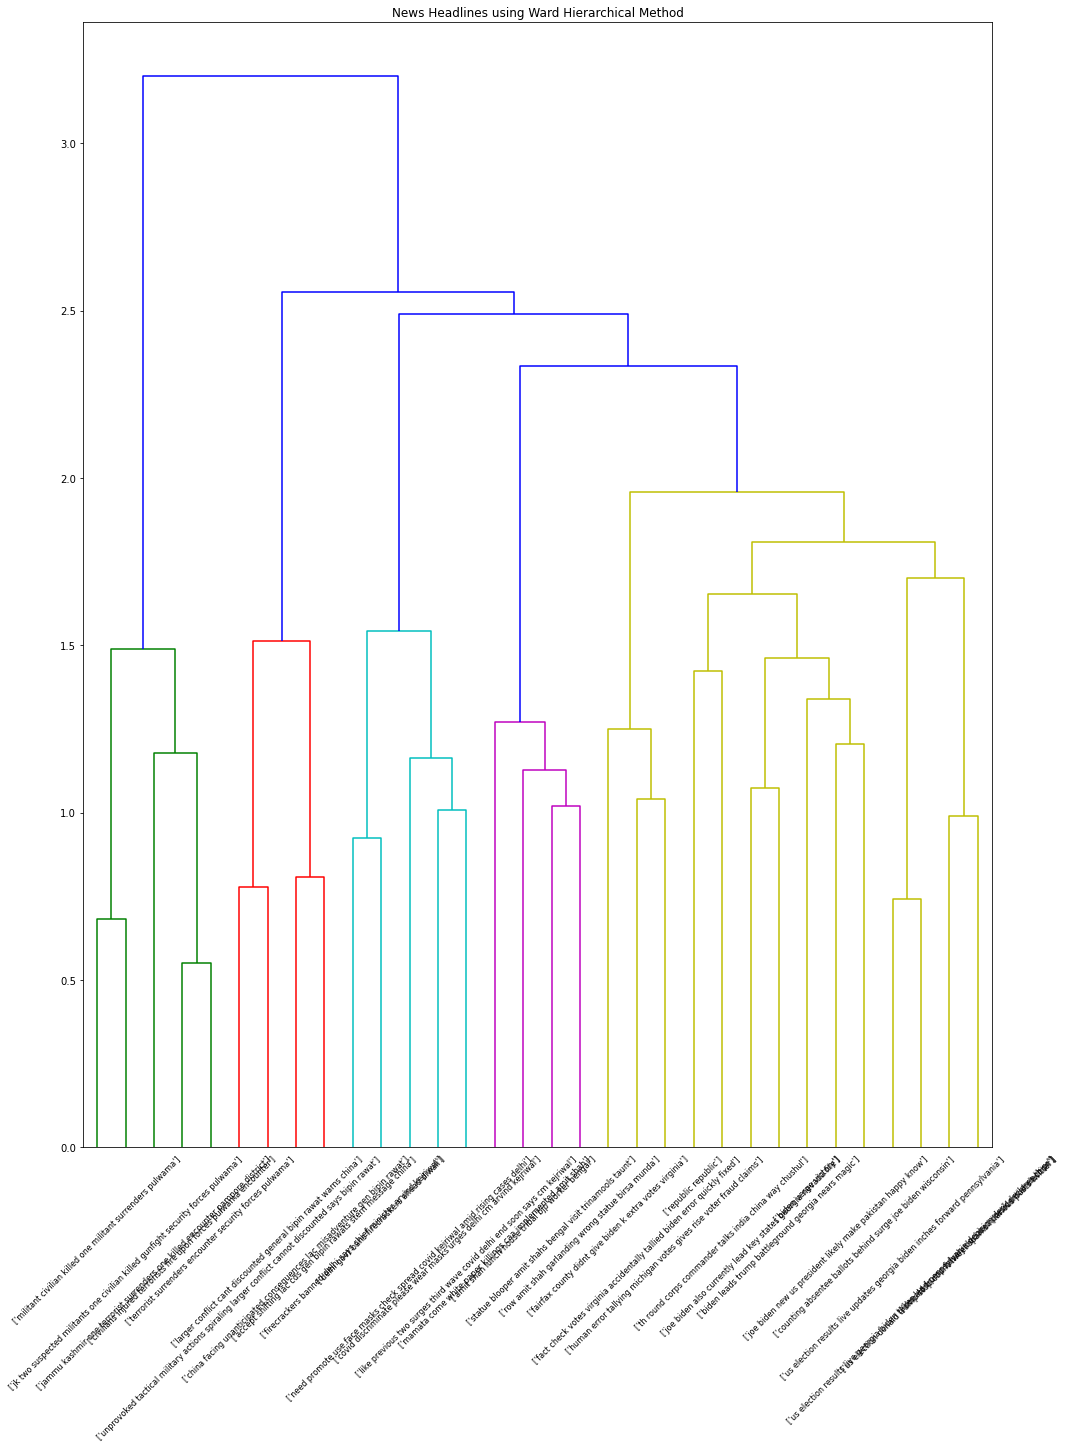

In [18]:
def main():
    print("Starting run")
    mainScrapp()
    ppMain()
    kmeansMain()
    hierarchicalMain()
    print("Run complete")


if __name__ == '__main__':
    main()

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

In [22]:
fake_df = pd.read_csv('FakeNews/Fake.csv')
real_df = pd.read_csv('FakeNews/True.csv')

In [23]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [24]:
real_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [25]:
fake_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [26]:
real_df.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [27]:
fake_df.drop(['date', 'subject'], axis=1, inplace=True)
real_df.drop(['date', 'subject'], axis=1, inplace=True)

In [28]:
fake_df['class'] = 0 
real_df['class'] = 1

Text(0, 0.5, '# of News Articles')

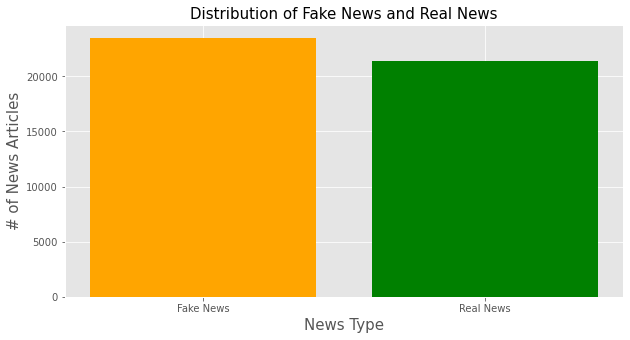

In [29]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df), color='orange')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)

In [30]:
print('Difference in news articles:',len(fake_df)-len(real_df))

Difference in news articles: 2064


In [31]:
news_df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)
news_df

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [32]:
news_df['text'] = news_df['title'] + news_df['text']
news_df.drop('title', axis=1, inplace=True)

In [33]:
features = news_df['text']
targets = news_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

In [34]:
import re
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [35]:
from keras.preprocessing.text import Tokenizer
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [36]:
# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [37]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
__________________________________________________

In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1078/1078 [==============================] - ETA: 0s - loss: 0.3567 - accuracy: 0.8097WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001CD51FD2318> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

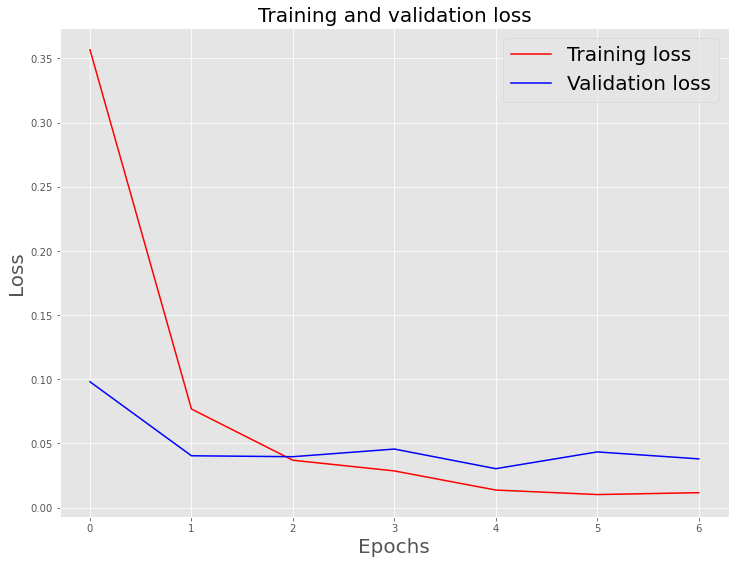

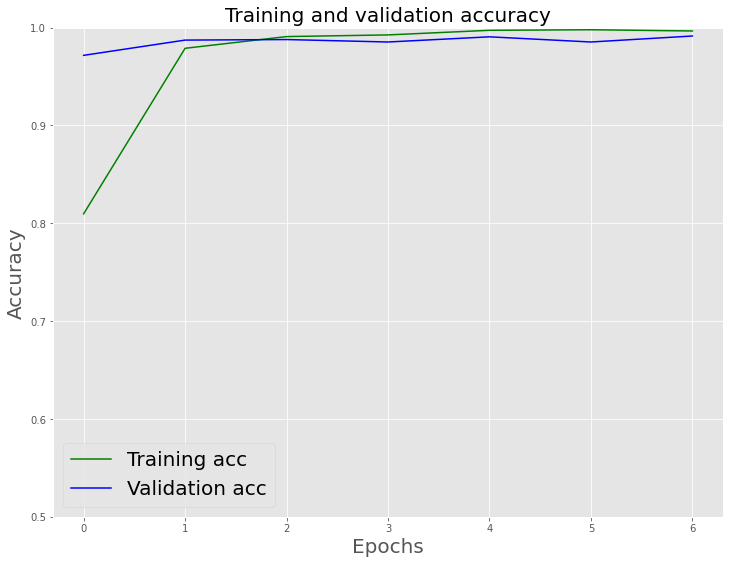

In [40]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [41]:
model.evaluate(X_test, y_test)

281/281 [==============================] - 11s 40ms/step - loss: 0.0358 - accuracy: 0.9904


[0.03579828143119812, 0.9904231429100037]

In [42]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [43]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9904231625835189
Precision on testing set: 0.9898100972672533
Recall on testing set: 0.9902687673772012


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

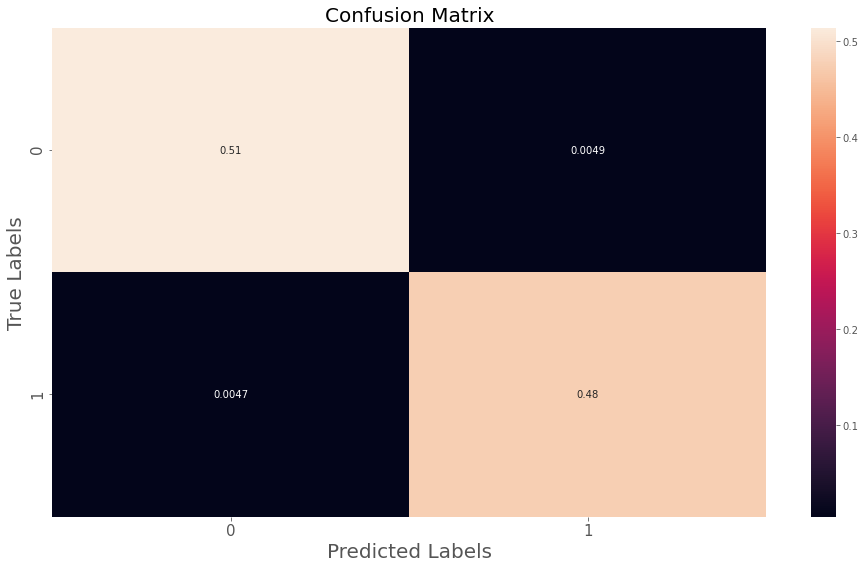

In [44]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

https://www.kaggle.com/snanilim/100-accuracy-is-this-title-fake-or-real